In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import the libraries
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/mrl.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:

import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
from tensorflow.keras.preprocessing import  image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import MaxPooling2D

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [ ]:
batchsize=8

In [ ]:
train_datagen= ImageDataGenerator(rescale=1./255, rotation_range=0.2,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2, validation_split=0.2)

train_data= train_datagen.flow_from_directory(r'/tmp/mrl/train',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical',subset='training' )

validation_data= train_datagen.flow_from_directory(r'/tmp/mrl/train',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical', subset='validation')

Found 50940 images belonging to 2 classes.
Found 12733 images belonging to 2 classes.


In [ ]:
train_data.class_indices

{'closed_eye': 0, 'open_eye': 1}

In [ ]:
train_data.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(r'/tmp/mrl/test',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical')

Found 21225 images belonging to 2 classes.


In [ ]:
# Creating MobileNetV2 Model with Transfer Learning:
bmodel_mobilenet = MobileNetV2(include_top=False, weights='imagenet', input_tensor=Input(shape=(80, 80, 3)))
hmodel_mobilenet = bmodel_mobilenet.output
hmodel_mobilenet = Flatten()(hmodel_mobilenet)
hmodel_mobilenet = Dense(64, activation='relu')(hmodel_mobilenet)
hmodel_mobilenet = Dropout(0.5)(hmodel_mobilenet)
hmodel_mobilenet = Dense(2, activation='softmax')(hmodel_mobilenet)


In [ ]:
model = Model(inputs=bmodel_mobilenet.input, outputs=hmodel_mobilenet)
for layer in bmodel_mobilenet.layers:
    layer.trainable = False

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 80, 80, 3)]          0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 40, 40, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 40, 40, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 40, 40, 32)           0         ['bn_Conv1[0][0]']        

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau

In [ ]:
checkpoint = ModelCheckpoint(r'/tmp/mrl/mobilenet.h5',
                            monitor='val_loss',save_best_only=True,verbose=3)

In [ ]:
earlystop = EarlyStopping(monitor = 'val_loss', patience=7, verbose= 3, restore_best_weights=True)

learning_rate = ReduceLROnPlateau(monitor= 'val_loss', patience=3, verbose= 3, )

callbacks=[earlystop,learning_rate]

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model_fit_mobilenet = model.fit_generator(
    train_data,
    steps_per_epoch=train_data.samples // batchsize,
    validation_data=validation_data,
    validation_steps=validation_data.samples // batchsize,
    callbacks=callbacks,
    epochs=10
)

Epoch 1/10
6367/6367 [==============================] - 232s 35ms/step - loss: 0.3537 - accuracy: 0.8535 - val_loss: 0.3515 - val_accuracy: 0.8511 - lr: 0.0010
Epoch 2/10
6367/6367 [==============================] - 216s 34ms/step - loss: 0.2696 - accuracy: 0.8933 - val_loss: 0.3147 - val_accuracy: 0.8643 - lr: 0.0010
Epoch 3/10
6367/6367 [==============================] - 211s 33ms/step - loss: 0.2468 - accuracy: 0.9025 - val_loss: 0.3066 - val_accuracy: 0.8687 - lr: 0.0010
Epoch 4/10
6367/6367 [==============================] - 212s 33ms/step - loss: 0.2333 - accuracy: 0.9086 - val_loss: 0.2930 - val_accuracy: 0.8720 - lr: 0.0010
Epoch 5/10
6367/6367 [==============================] - 208s 33ms/step - loss: 0.2313 - accuracy: 0.9092 - val_loss: 0.3176 - val_accuracy: 0.8772 - lr: 0.0010
Epoch 6/10
6367/6367 [==============================] - 215s 34ms/step - loss: 0.2234 - accuracy: 0.9129 - val_loss: 0.3199 - val_accuracy: 0.8726 - lr: 0.0010
Epoch 7/10
6367/6367 [==================

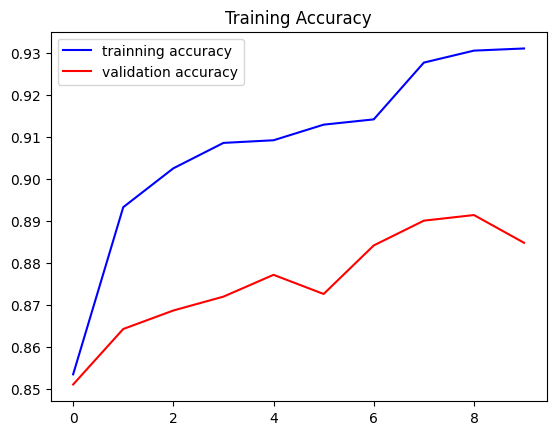

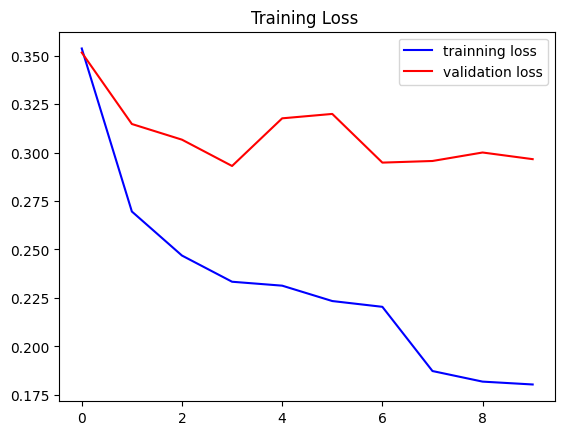

<Figure size 640x480 with 0 Axes>

In [ ]:
accuracy = model_fit_mobilenet.history['accuracy']
val_accuracy = model_fit_mobilenet.history['val_accuracy']
loss = model_fit_mobilenet.history['loss']
val_loss = model_fit_mobilenet.history['val_loss']
epochs = range(len(accuracy))



plt.title("Training Accuracy")
plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()

plt.show()
plt.savefig("Accuracy.jpg")


plt.title("Training Loss ")
plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()

plt.show()
plt.savefig("Loss.jpg")

In [ ]:
loss_tr, acc_tr = model.evaluate_generator(train_data)
print(acc_tr)
print(loss_tr)

In [ ]:
loss_vr, acc_vr  = model.evaluate_generator(validation_data)
print(acc_vr)
print(loss_vr)

In [ ]:
loss_test, acc_test = model.evaluate_generator(test_data)
print(acc_test)
print(loss_test)